## 셀프 주유소는 정말 저렴할까?

In [42]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

#### 1. 서울시 구별 주유소 가격 정보 얻기

In [43]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome()
driver.get(url)

In [45]:
# 싼 주유소 찾기
driver.find_element_by_css_selector('.ic_m1').click()

In [46]:
# 서울 자치구 리스트 가져오기
metro = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')
metro.send_keys('서울')
time.sleep(1)

In [47]:
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = sigungu.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0]

In [48]:
# 25개 자치구에 대해서 주유소 정보 엑셀 저장
for gu in gu_names:
    sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(2)
    
    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

In [49]:
driver.close()

#### 2.

In [50]:
from glob import glob

In [51]:
glob('C:/Users/김성민/Downloads/지역*.xls')

['C:/Users/김성민/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/김성민/Downloads\\지역_위치별(주유소) (5).xls',
 'C:/Users/김성민/Downloads\

In [52]:
file = glob('C:/Users/김성민/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1969,1899,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1983,1927,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,2145,1995,1920,1460
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,2015,1950,-
4,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,2214,2025,1969,1650


In [53]:
# 25개 파일을 읽어서 하나의 데이터프레임으로 만들기
df_list = []
for file in glob('C:/Users/김성민/Downloads/지역*.xls'):
    gas = pd.read_excel(file, header=2)
    df_list.append(gas)

df = pd.concat(df_list)
df.shape

(464, 10)

In [54]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스


In [55]:
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2455,N,GS칼텍스
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스
33,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지
34,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL
35,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지


In [56]:
df['구'] = df.주소.str.split().str[1]
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스,강동구


In [57]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [60]:
# 가격이 - 이면 삭제하고, 정수로 변환
df = df[df.가격 != '-']
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      456 non-null    object
 1   주소      456 non-null    object
 2   가격      456 non-null    int32 
 3   셀프      456 non-null    object
 4   상표      456 non-null    object
 5   구       456 non-null    object
dtypes: int32(1), object(5)
memory usage: 23.2+ KB


In [79]:
df.to_csv('서울_주유소(220418).csv', index=False)

#### 3. 셀프 주유소가 정말 저렴한지 확인

In [61]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [63]:
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

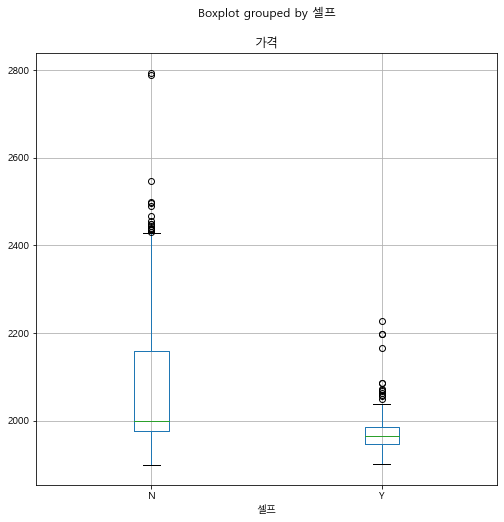

In [64]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [66]:
df[df.셀프 == 'Y'].가격.mean(), df[df.셀프 == 'N'].가격.mean() 

(1973.3148936170212, 2090.8552036199094)

- Scipy를 이용한 가설검정
    - 2-Sample T-점정(독립표본 T검정)

In [81]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.699287636561897, pvalue=4.85982582678616e-19)

- p-value가 0.05보다 작으므로 귀무가설 기각, 즉 대립가설 채택
    - H0(귀무가설): 셀프주유소와 일반주유소의 가격 차이가 없다.
    - H1(대립가설): 셀프주유소의 가격이 일반주유소보다 저렴하다.

- 상표별로 가격 확인

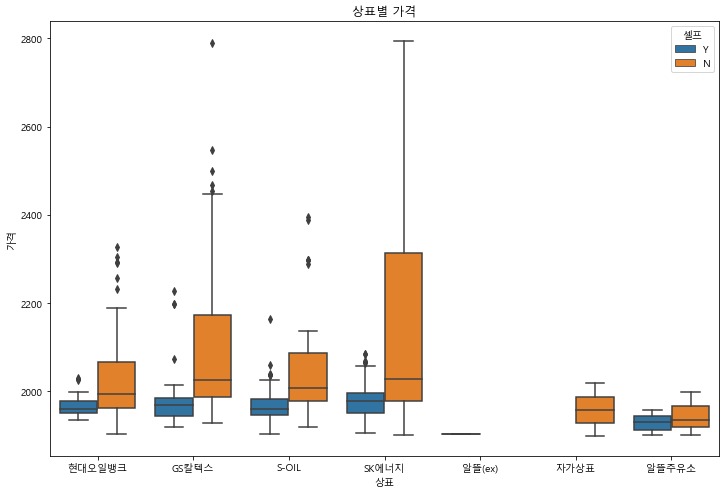

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='가격',hue='셀프',data=df)
plt.title('상표별 가격')
plt.show()

#### 4. 구별 휘발유 가격 비교

In [67]:
import json, folium

In [68]:
# 가격이 착한 주유소 Top 5
df.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
0,정호주유소,서울 성동구 고산자로 307 (마장동),1898,N,자가상표,성동구
1,화곡역주유소,서울 강서구 강서로 154 (화곡동),1902,Y,알뜰주유소,강서구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1902,N,SK에너지,양천구
0,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1902,N,알뜰주유소,강서구
2,현대주유소,서울 양천구 남부순환로 372 (신월동),1904,Y,S-OIL,양천구


In [69]:
# 가격이 비싼 주유소 Top 5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2794,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2789,N,GS칼텍스,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스,강남구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2499,N,GS칼텍스,중구
31,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2497,N,SK에너지,서초구


In [72]:
# 구별 비교
df.groupby('구')['가격'].agg(['mean','min','max']).sort_values(by='mean', ascending=False)

,mean,min,max
구,,,
용산구,2384.076923,2232,2789
중구,2288.100000,1959,2794
종로구,2243.500000,2049,2438
강남구,2131.848485,1977,2548
강동구,2072.928571,1969,2298
성동구,2070.470588,1898,2328
서초구,2047.968750,1904,2497
영등포구,2035.461538,1946,2428
구로구,2030.571429,1919,2448


- 구별 비교한 것을 단계구분도로 표시

In [74]:
gu_data = df.groupby('구')[['가격']].mean()
gu_data.head()

,가격
구,
강남구,2131.848485
강동구,2072.928571
강북구,1960.461538
강서구,1984.156250
관악구,2004.214286


In [75]:
filename = '../04.지도시각화/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename, encoding='utf-8'))

In [76]:
import numpy as np

def get_text_location(geo_str):
    gu_dict = {}
    for gu in geo_str['features']:
        for coord in gu['geometry']['coordinates']:
            geo = np.array(coord)
            gu_dict[gu['id']] = [np.mean(geo[:,1]), np.mean(geo[:,0])]
    return gu_dict

In [77]:
from folium.features import DivIcon

gu_dict = get_text_location(geo_str)

In [78]:
map = folium.Map(location=[37.5502, 126.9820], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data.가격,
    columns=[gu_data.index, gu_data.가격],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
for gu_name in gu_data.index:
    folium.Marker(
        location=gu_dict[gu_name],
        icon=DivIcon(icon_size=(80,20), icon_anchor=(20,0),
            html=f'<div style="font-size:10pt">{gu_name}</div>'
        )
    ).add_to(map)
title_html = '<h3 align="center", stle="font-size=20px">구별 휘발유 가격</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map 

## 구별로 가격이 싼 / 비싼 주유소 각 1곳을 지도 위에 표시

In [179]:
import requests
from urllib.parse import quote

In [180]:
df2 = pd.read_csv('서울_주유소(220418).csv')
df2.shape

(456, 6)

In [181]:
df2.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스,강동구


In [182]:
with open('../04.지도시각화/kakaoapikey.txt') as file:
    kakao_key = file.read()
local_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {'Authorization': f'KakaoAK {kakao_key}'}

# url = f'{local_url}?query={quote(addr)}'
# result = requests.get(url, headers=header).json()

In [183]:
df2.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [184]:
df2.sort_values(by='가격', inplace=True)
df2.head()

,상호,주소,가격,셀프,상표,구
102,정호주유소,서울 성동구 고산자로 307 (마장동),1898,N,자가상표,성동구
301,화곡역주유소,서울 강서구 강서로 154 (화곡동),1902,Y,알뜰주유소,강서구
175,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1902,N,SK에너지,양천구
300,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1902,N,알뜰주유소,강서구
177,현대주유소,서울 양천구 남부순환로 372 (신월동),1904,Y,S-OIL,양천구


In [185]:
min_addr_list, max_addr_list, min_name_list, max_name_list = [], [], [], []
for gu in list(df2.구.unique()):
    for i in range(456):
        if df2.구[i] == gu:
            min_addr_list.append(df2.주소[i])
            min_name_list.append(df2.상호[i])
            break
    for i in range(456)[::-1]:
        if df2.구[i] == gu:
            max_addr_list.append(df2.주소[i])
            max_name_list.append(df2.상호[i])
            break

In [186]:
min_lng_list, min_lat_list, max_lng_list, max_lat_list = [], [], [], []
for i in range(len(min_addr_list)):
    min_url = f'{local_url}?query={quote(min_addr_list[i])}'
    min_result = requests.get(min_url, headers=header).json()
    min_lng_list.append(float(min_result['documents'][0]['x']))
    min_lat_list.append(float(min_result['documents'][0]['y']))

for i in range(len(max_addr_list)):
    max_url = f'{local_url}?query={quote(max_addr_list[i])}'
    max_result = requests.get(max_url, headers=header).json()
    max_lng_list.append(float(max_result['documents'][0]['x']))
    max_lat_list.append(float(max_result['documents'][0]['y']))

coordf = pd.DataFrame({'구':list(df2.구.unique()), '최저가주소':min_addr_list, 'minname':min_name_list, 'minlng':min_lng_list, 'minlat':min_lat_list,
                       '최고가주소':max_addr_list, 'maxname':min_name_list, 'maxlng':max_lng_list, 'maxlat':max_lat_list})
coordf.head()

,구,최저가주소,minname,minlng,minlat,최고가주소,maxname,maxlng,maxlat
0,성동구,서울 성동구 고산자로 307 (마장동),정호주유소,127.036537,37.567202,서울 성동구 광나루로 254 (성수동2가),정호주유소,127.057911,37.548576
1,강서구,서울 강서구 곰달래로 207 (화곡동),뉴신정주유소,126.856035,37.531562,서울 강서구 양천로 720 (염창동),뉴신정주유소,126.875677,37.549218
2,양천구,서울 양천구 가로공원로 165 (신월동),가로공원주유소,126.834299,37.537020,서울 양천구 안양천로 657 (신정동),가로공원주유소,126.870696,37.505861
3,서초구,서울 서초구 양재대로12길 73-71,만남의광장주유소,127.042625,37.459645,서울 서초구 방배로 66 (방배동),만남의광장주유소,126.998516,37.480693
4,구로구,서울 구로구 오리로 1299 (궁동),처음처럼주유소,126.828965,37.497395,서울 구로구 구로동로 137 (구로동),처음처럼주유소,126.883528,37.491018


In [187]:
for i in coordf.index:
    folium.Marker(
        location=[coordf.minlat[i], coordf.minlng[i]],
        popup=folium.Popup(coordf.최저가주소[i], max_width=200),
        tooltip=coordf.minname[i],
        icon=folium.Icon(color='blue', icon='arrow-down', prefix='fa')
    ).add_to(map)
    folium.Marker(
        location=[coordf.maxlat[i], coordf.maxlng[i]],
        popup=folium.Popup(coordf.최고가주소[i], max_width=200),
        tooltip=coordf.maxname[i],
        icon=folium.Icon(color='red', icon='arrow-up', prefix='fa')
    ).add_to(map)
title_html = '<h3 align="center", stle="font-size=20px">구별 휘발유 가격</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map 